## Import Dependancies

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,CUR_ILL,HISTORY,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,33.0,26-35,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,64.0,56-65,1.0,0.0,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,37.0,36-45,1.0,1.0,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [3]:
severity = data_df['SEVERITY_LEVEL'].unique()

## Prep Data For Model

In [4]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [5]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 2, 1, 1])

In [6]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [7]:
# Scaling the train data with StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Testing KNN to Determine Best k value

In [8]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

k: 1, Train/Test Score: 0.863/0.827
k: 3, Train/Test Score: 0.892/0.883


KeyboardInterrupt: 

Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [8]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.893


In [9]:
X.columns

Index(['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M',
       'JANSSEN', 'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1',
       'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35',
       '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +'],
      dtype='object')

### Test Prediction 1

In [55]:
# Sample Prediction 1
sample_user1 = [[0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1]]
predicted_symptoms = knn.predict(sample_user1)
print(severity[predicted_symptoms])

['MILD']


In [56]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=200)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors

[18497, 5421, 3158, 6329, 4389, 3017, 12221, 19238, 20622, 13042, 19979, 12697, 14170, 14056, 6353, 5109, 20363, 21829, 26357, 20164, 337, 588, 167, 11186, 12270, 12305, 10237, 13186, 12696, 9819, 15062, 14602, 13986, 14294, 16424, 7091, 19198, 18792, 18004, 17444, 21991, 24119, 26317, 6805, 7301, 8864, 9435, 4516, 2339, 14879, 5166, 20526, 335, 2473, 13048, 2051, 1665, 383, 15187, 2003, 11274, 8516, 7646, 12200, 12286, 12330, 9921, 19532, 13040, 12911, 12530, 13740, 11651, 10588, 15023, 5077, 4975, 14734, 5570, 7238, 29, 15277, 16255, 4935, 9524, 5036, 5086, 9495, 19809, 17198, 16987, 21448, 17438, 23082, 22472, 24022, 23605, 24165, 25921, 17488, 18416, 14040, 6243, 7340, 16324, 8875, 23863, 7317, 4837, 6325, 6617, 2365, 3390, 7518, 6985, 3613, 4147, 7027, 4973, 8674, 5195, 8722, 8609, 4405, 8651, 4665, 348, 377, 8682, 5700, 2439, 2567, 2735, 4632, 4662, 6931, 3603, 3467, 8201, 3340, 2559, 2745, 277, 4919, 4635, 4507, 3658, 7677, 2997, 4715, 7546, 3588, 3000, 5221, 4729, 4402, 4363, 7

In [57]:
# save nearest 100 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users].tolist()
predicted_symptoms[:5]

['Injection Site Irritation/Discomfort',
 'Chills',
 'Nausea/Vomiting',
 'Injection Site Irritation/Discomfort',
 'Chills']

In [58]:
# save nearest 100 neighbors severity levels as list for % tables
predicted_severity = data_df['SEVERITY_LEVEL'].iloc[like_users].tolist()
predicted_severity[:5]

['MILD', 'MILD', 'MILD', 'MILD', 'MILD']

In [62]:
# count the number of occurrences from nearest neighboors
def count_levels(lst):
    mld_ct = 0
    mod_ct = 0
    sev_ct = 0 
    for person in lst:
        if (person == 'MILD'):
            mld_ct = mld_ct + 1
        if (person == 'MODERATE'):
            mod_ct = mod_ct + 1
        if (person == 'SEVERE'):
            sev_ct = sev_ct + 1    
            
    return mld_ct, mod_ct, sev_ct

In [60]:
count_levels(predicted_severity)

(189, 8, 3)

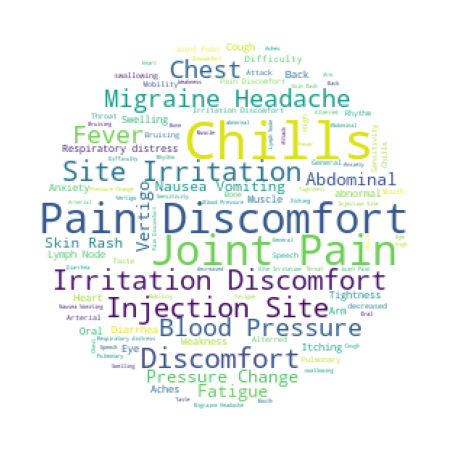

In [61]:
cloud_maker(predicted_symptoms)

In [53]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users].tolist()
predicted_symptoms[:5]

['Fever',
 'Nausea/Vomiting',
 'Injection Site Irritation/Discomfort',
 'Injection Site Irritation/Discomfort',
 'Abdominal Pain/Discomfort']

In [24]:
def cloud_maker(words):
    #convert list to string and generate
    unique_string=(" ").join(predicted_symptoms)

    #create circle mask
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    
    wordcloud = WordCloud(background_color="white", repeat=True,
                width = 1000, height = 500, mask=mask).generate(unique_string)
    
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("curr_cloud.png", bbox_inches='tight')
    plt.show()
    plt.close()

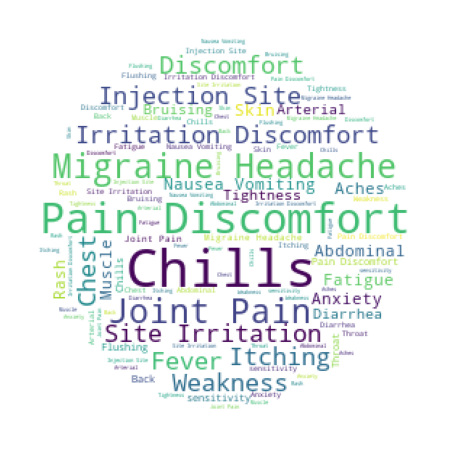

In [25]:
cloud_maker(predicted_symptoms)

In [26]:
severity

array(['MILD', 'MODERATE', 'SEVERE'], dtype=object)

In [19]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


#test mask
from PIL import Image
from os import path
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
new_mask = np.array(Image.open(path.join(d, 'circle_mask.png')))

wordcloud = WordCloud(background_color="white", repeat=True,
                      width = 1000, height = 500, mask=mask).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

NameError: name 'ImageColorGenerator' is not defined

In [45]:
# Sample Prediction 2
sample_user2 = [[0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]
predicted_symptoms = knn.predict(sample_user2)
print(severity[predicted_symptoms])

['MILD']


In [46]:
predicted_severity = data_df['SEVERITY_LEVEL'].iloc[like_users].tolist()
predicted_severity[:5]

['MILD', 'MILD', 'MILD', 'MILD', 'MILD']

In [47]:
count_levels(predicted_severity)

(99, 0, 1)

In [30]:
tree = KDTree(X)
ind = tree.query([[1.25, 1.35]], k=5)
print(ind)  # indices of 5 closest neighbors


print('People like you reported the following symptoms:')

ValueError: query data dimension must match training data dimension